#### Singleomic Results
##### Here we use the Renal Cancer dataset
- Load the dataset
- Use the data processing function from Models to get the data with variance filtered features and min max normalized, as well as the swap noisy data.

In [1]:
import Models
import numpy as np
import random as rn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

sns.set()

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# Load Data
X_renal_data = pd.read_csv('./x_exp_renal.csv', sep='\t') # Dataset has Donor ID as first column
y_renal_data = pd.read_csv('./y_renal.csv', sep=',') # Dataset has Donor ID on first column and Label on second column.

X_train_norm, X_train_swapped, X_test_norm, y_train, y_test, y_train_oh, y_test_oh, X_train_first, X_train_second, X_swapped_first, X_swapped_second, X_test_first, X_test_second \
    = Models.prepare_datasets(X_renal_data.iloc[:,1:],y_renal_data["label"], test_size=0.2, swap_noise=0.15)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

swapping: 65 rows.


In [14]:
import importlib
importlib.reload(Models)

<module 'Models' from 'F:\\Documentacion\\Data Science\\Python\\Notebooks\\oss-stage-2019\\Singleomic Dataset\\Models.py'>

In [ ]:
X_test_norm.shape

The Renal cancer dataset consists of 542 samples of 20503 features each. After processing, we obtain a training dataset of 433 samples and 5126 features. The labels are -1 and 1 for each subtype of cancer. Split of dataset 20%. Swap noise 15%. First, let's perform PCA to visualize the principal components and get the corresponding PCA latent space. 

we set the size of the latent spaces to 100 dimensions, so the compression factor on this case is 205 times from the original dataset, and 51.26 times for the training set.


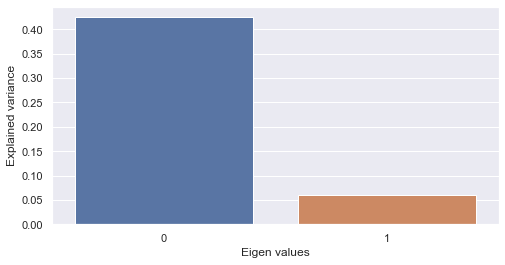

PCA on single-modal explained variance ratio: 0.4844522819717132


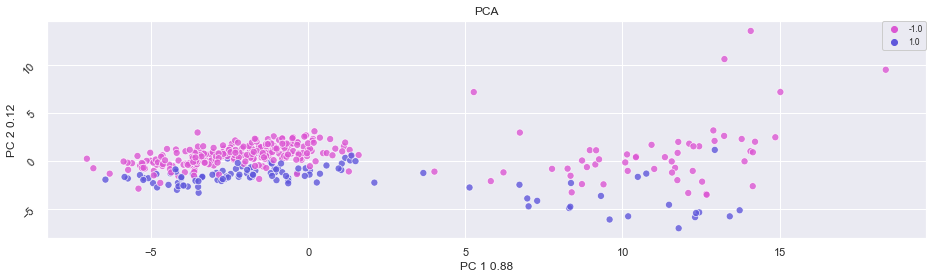

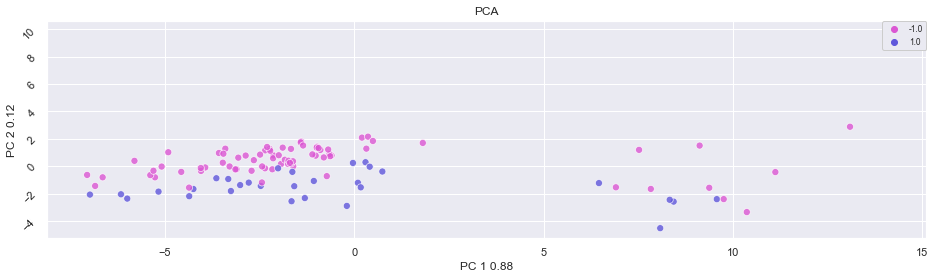

In [13]:
X_latent_pca, X_latent_pca_test = Models.perform_PCA(X_train_norm, pd.DataFrame(y_train), X_test_norm, y_test, n_components=2)

We see two bigger groups, to the left and to the right, with almost separated labels, the -1 labes top and the 1 labels on the bottom. This could pose a problem for clustering algorithms, but we should expect very high classification performance.

Let's then evaluate first on the original data.

Results for Original: 

Best score for training data: 0.979256883186314 

Best C: 0.08 



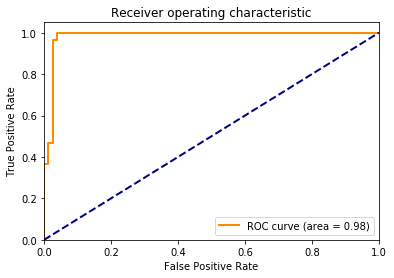

[[77  2]
 [ 1 29]]


              precision    recall  f1-score   support

          -1       0.99      0.97      0.98        79
           1       0.94      0.97      0.95        30

    accuracy                           0.97       109
   macro avg       0.96      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109

Training set score for Logistic Regression: 0.988453
Testing  set score for Logistic Regression: 0.972477
Best score for training data: 0.8452552793370757 

Best C: 1.0 

Best Gamma: 0.1 



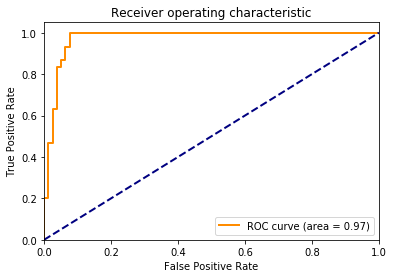

[[78  1]
 [16 14]]


              precision    recall  f1-score   support

          -1       0.83      0.99      0.90        79
           1       0.93      0.47      0.62        30

    accuracy                           0.84       109
   macro avg       0.88      0.73      0.76       109
weighted avg       0.86      0.84      0.82       109

Training set score for SVM: 1.000000
Testing  set score for SVM: 0.844037
Best score for training data: 0.9769847634322375 

Best #estimators: 140 

Best max depth: None 



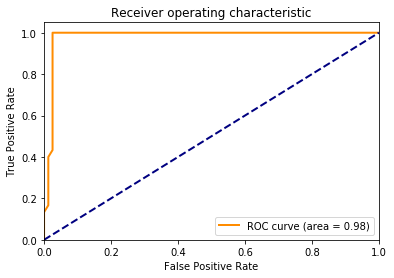

[[77  2]
 [ 0 30]]


              precision    recall  f1-score   support

          -1       1.00      0.97      0.99        79
           1       0.94      1.00      0.97        30

    accuracy                           0.98       109
   macro avg       0.97      0.99      0.98       109
weighted avg       0.98      0.98      0.98       109

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.981651


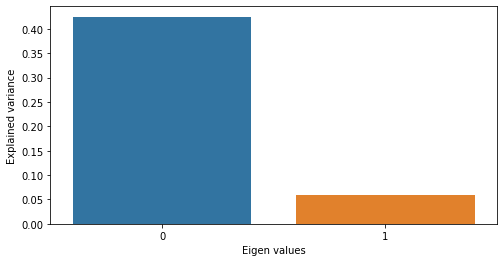

PCA on single-modal explained variance ratio: 0.4844522819717132


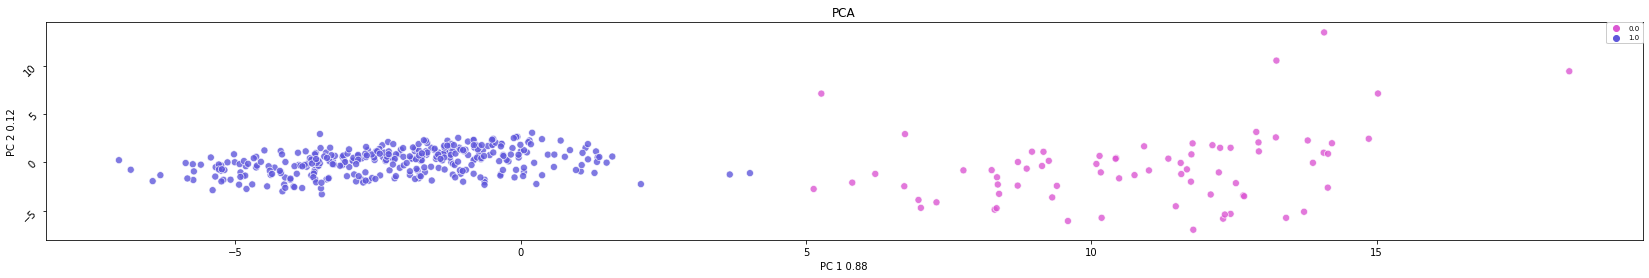

2 clusters -  silhoutte score: 0.4869294115073358 - mutual information: 0.00048442643640750696
3 clusters -  silhoutte score: 0.11371705136389965 - mutual information: 0.015072055162413884
4 clusters -  silhoutte score: 0.10468121489718786 - mutual information: 0.024268732565646968


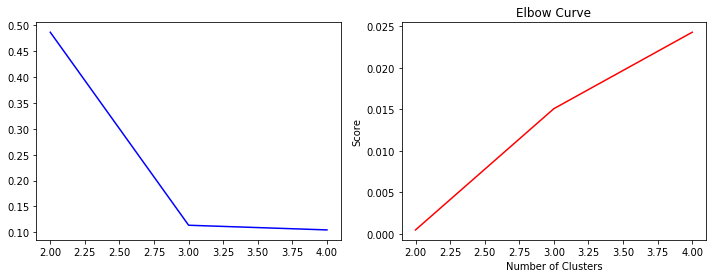

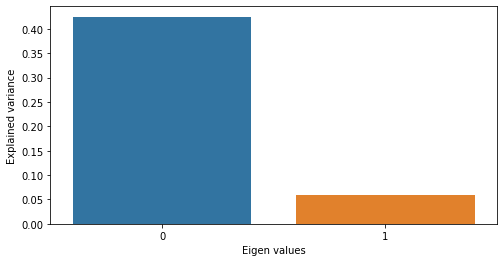

PCA on single-modal explained variance ratio: 0.4844522819717132


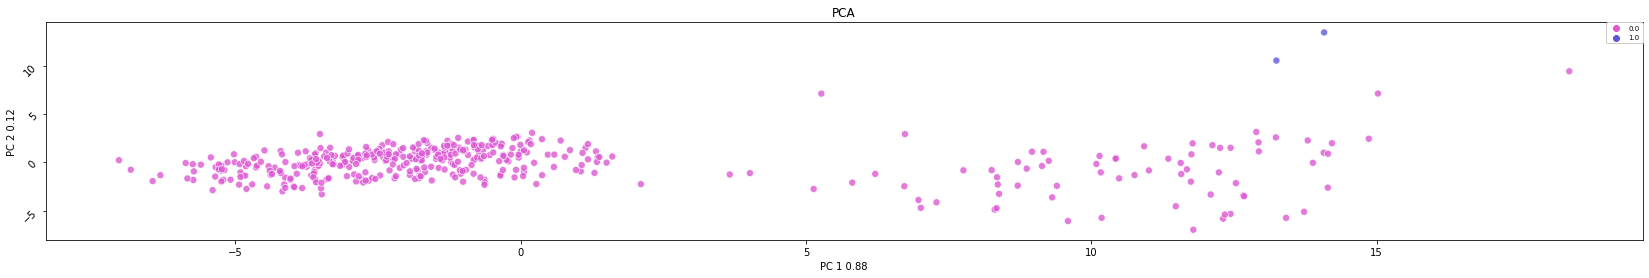

2 clusters -  silhoutte score: 0.5930300736027011 - mutual information: 0.004700797981186954
3 clusters -  silhoutte score: 0.5383175686645227 - mutual information: 0.006876345333197873


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\cluster\_kmeans.py:296: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  ).fit(X, sample_weight=sample_weight)


4 clusters -  silhoutte score: 0.5580327980552643 - mutual information: 0.004676185035240074


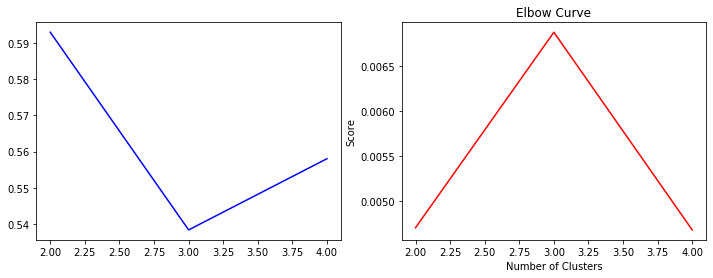

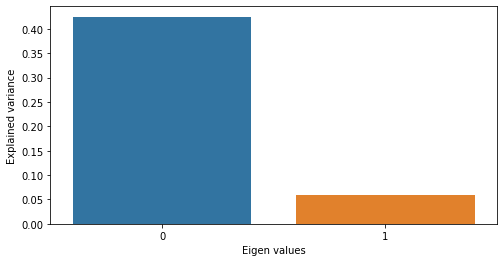

PCA on single-modal explained variance ratio: 0.4844522819717132


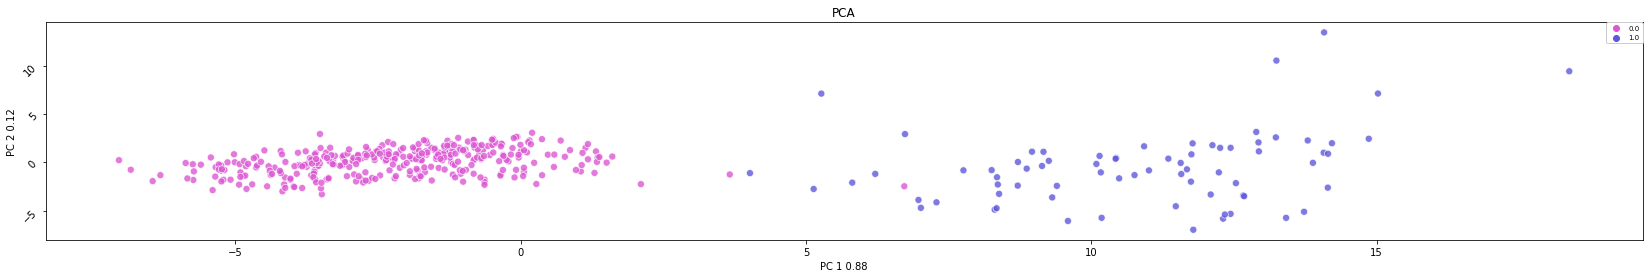

2 clusters -  silhoutte score: 0.4835834437201003 - mutual information: 7.040106130255923e-05
3 clusters -  silhoutte score: 0.0989409306677283 - mutual information: 0.00399817915185137
4 clusters -  silhoutte score: 0.08951651390868207 - mutual information: 0.011293779010482452


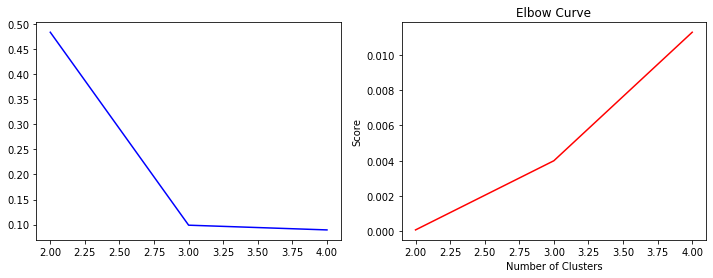

,LR accuracy,SVM accuracy,RF accuracy,LR ROC-AUC,SVM ROC-AUC,RF ROC-AUC,KMeans Silhouette,Spectral Silhouette,Hierarchical Silhouette,KMeans MI,Spectral MI,Hierarchical MI
original,0.972477,0.844037,0.981651,0.98481,0.97384,0.981857,0.486929,0.59303,0.483583,0.024269,0.004676,0.011294


No classifier: 0.7247706422018348


In [27]:
### CLASSIFICATION ###
classify = Models.classify(X_train_norm, X_test_norm, np.ravel(y_train), np.ravel(y_test), model_type="Original")
### CLUSTERING ###
clustering = Models.cluster(X_train_norm,np.ravel(y_train), model_type="Original")

original_scores = pd.DataFrame([classify + clustering], index=["original"],
                      columns=["LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
display(original_scores)
no_classifier_score = pd.DataFrame(y_test).iloc[:,0].value_counts()[-1]/len(y_test)
print(f"No classifier: {no_classifier_score}")

As we suspected, the classification values are very high, while the Mutual information value is very low, indicating divergence between the ground truth labels and the ones obtained by clustering.

Let's see the performance on PCA latent space.

Results for PCA: 

Best score for training data: 0.979256883186314 

Best C: 0.08 



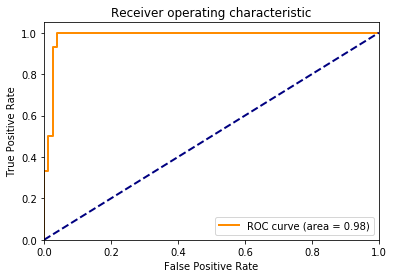

[[76  3]
 [ 1 29]]


              precision    recall  f1-score   support

          -1       0.99      0.96      0.97        79
           1       0.91      0.97      0.94        30

    accuracy                           0.96       109
   macro avg       0.95      0.96      0.95       109
weighted avg       0.96      0.96      0.96       109

Training set score for Logistic Regression: 0.983834
Testing  set score for Logistic Regression: 0.963303
Best score for training data: 0.886901897888265 

Best C: 1.0 

Best Gamma: 0.1 



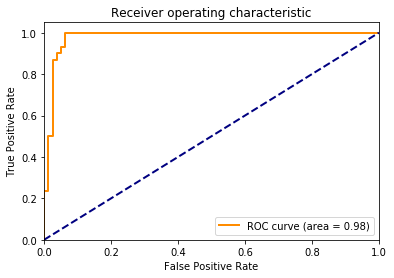

[[77  2]
 [ 6 24]]


              precision    recall  f1-score   support

          -1       0.93      0.97      0.95        79
           1       0.92      0.80      0.86        30

    accuracy                           0.93       109
   macro avg       0.93      0.89      0.90       109
weighted avg       0.93      0.93      0.92       109

Training set score for SVM: 0.993072
Testing  set score for SVM: 0.926606
Best score for training data: 0.8960973001871156 

Best #estimators: 100 

Best max depth: 12 



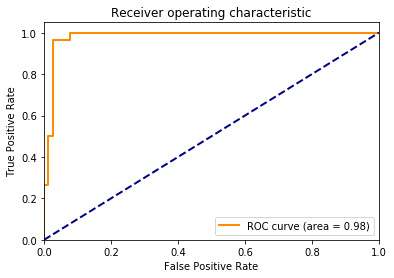

[[77  2]
 [ 5 25]]


              precision    recall  f1-score   support

          -1       0.94      0.97      0.96        79
           1       0.93      0.83      0.88        30

    accuracy                           0.94       109
   macro avg       0.93      0.90      0.92       109
weighted avg       0.94      0.94      0.93       109

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.935780


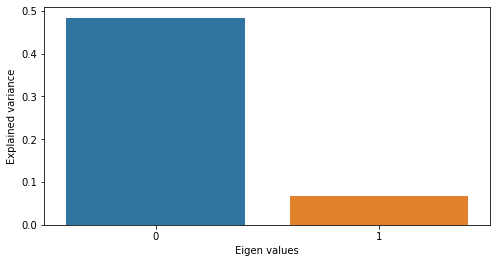

PCA on single-modal explained variance ratio: 0.5515740526802817


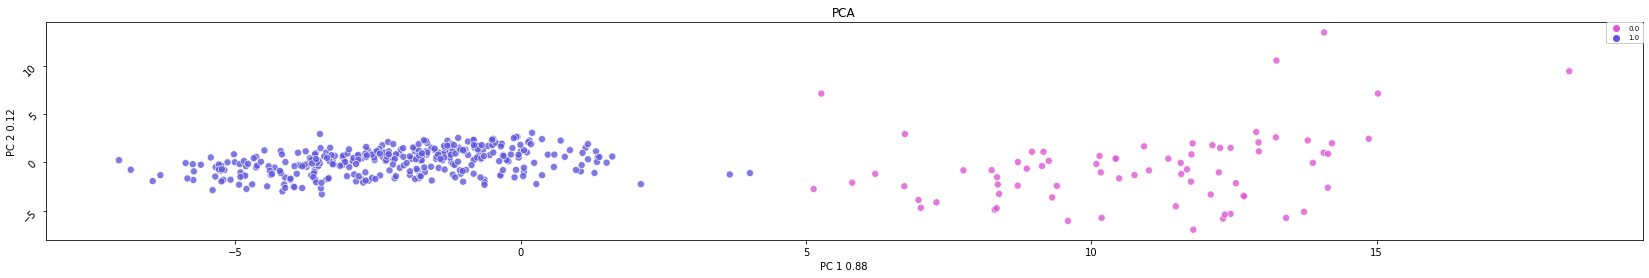

2 clusters -  silhoutte score: 0.54173556664541 - mutual information: 0.00048442643640750696
3 clusters -  silhoutte score: 0.15248171371553257 - mutual information: 0.014607796331400105
4 clusters -  silhoutte score: 0.14394817175957972 - mutual information: 0.0317646247299207


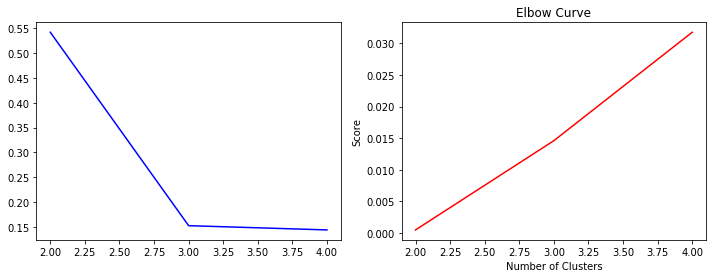

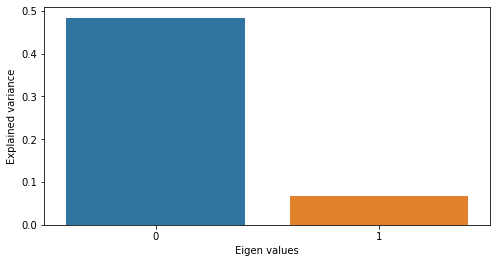

PCA on single-modal explained variance ratio: 0.5515740526802817


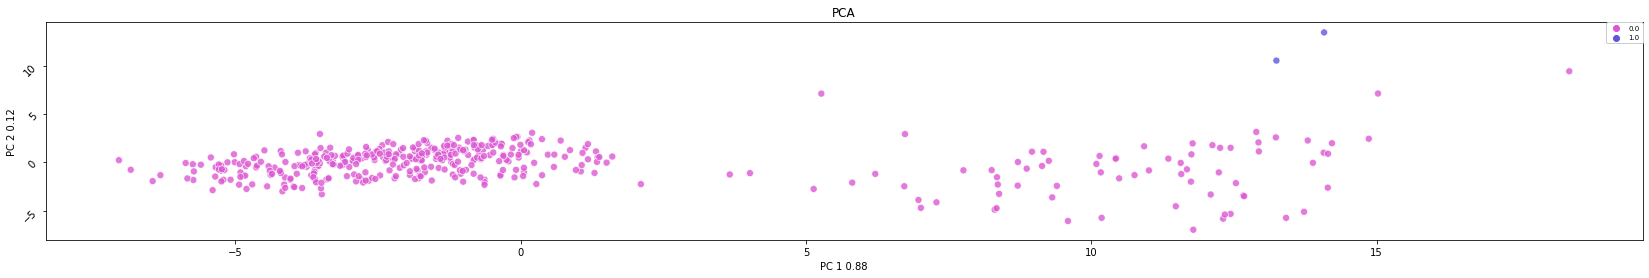

2 clusters -  silhoutte score: 0.6301366054513045 - mutual information: 0.004700797981186954
3 clusters -  silhoutte score: 0.5975992484483222 - mutual information: 0.004676185035240074
4 clusters -  silhoutte score: 0.576446206287635 - mutual information: 0.006841277168511251


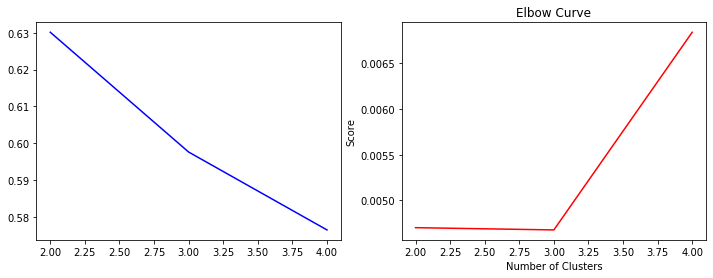

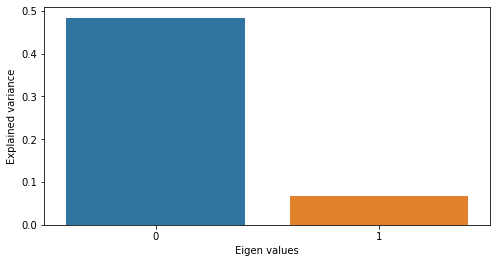

PCA on single-modal explained variance ratio: 0.5515740526802817


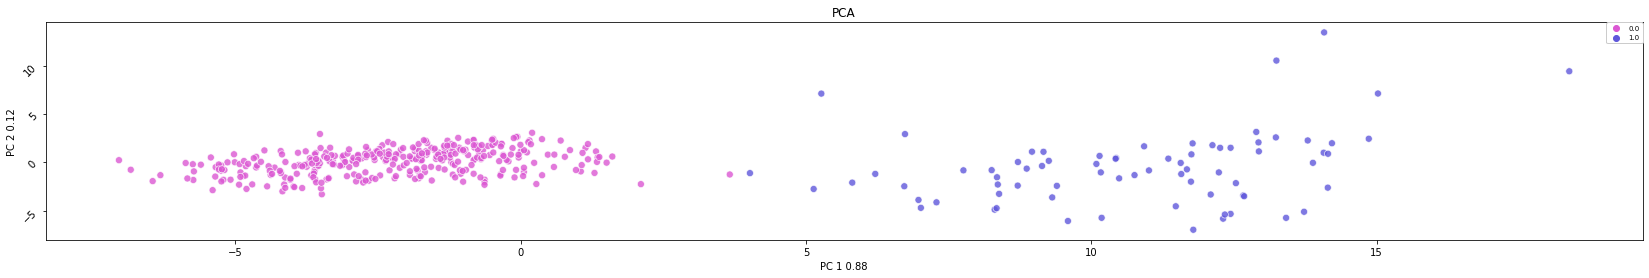

2 clusters -  silhoutte score: 0.5394861857488619 - mutual information: 0.0003339088774655787
3 clusters -  silhoutte score: 0.135938805605334 - mutual information: 0.0010415543280931977
4 clusters -  silhoutte score: 0.1278085323812483 - mutual information: 0.013284024698736437


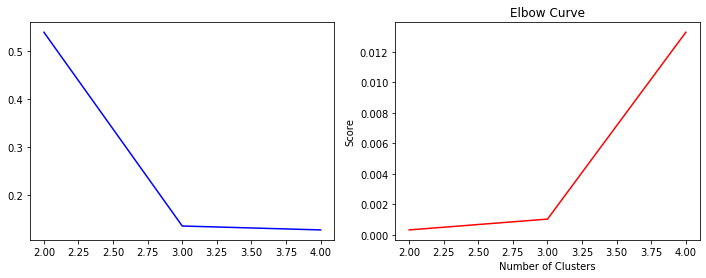

,LR accuracy,SVM accuracy,RF accuracy,LR ROC-AUC,SVM ROC-AUC,RF ROC-AUC,KMeans Silhouette,Spectral Silhouette,Hierarchical Silhouette,KMeans MI,Spectral MI,Hierarchical MI
original,0.972477,0.844037,0.981651,0.984810,0.973840,0.981857,0.486929,0.593030,0.483583,0.024269,0.004676,0.011294
PCA,0.963303,0.926606,0.935780,0.984388,0.980169,0.982700,0.541736,0.630137,0.539486,0.000484,0.004701,0.000334


No classifier: 0.7247706422018348


In [57]:
### CLASSIFICATION ###
classify = Models.classify(X_latent_pca, X_latent_pca_test, np.ravel(y_train), np.ravel(y_test), model_type="PCA")
### CLUSTERING ###
clustering = Models.cluster(X_latent_pca,np.ravel(y_train), model_type="PCA")

pca_scores = pd.DataFrame([classify + clustering], index=['PCA'],
                      columns=["LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
display(pd.concat([original_scores, pca_scores]))
print(f"No classifier: {no_classifier_score}")

We can see a minor improvement in the overall performance, even though the results are similar. The classification metrics are significatively higher than the 'No classifier' case, so we will consider the clustering performance as more important.

Let's try using KPCA. The best hyperparameters found for this dataset was the rbf kernel function with gamma = 0.002.

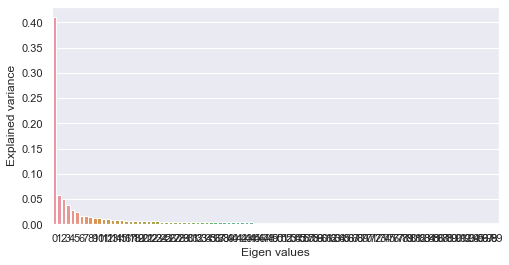

0.6103838707576238


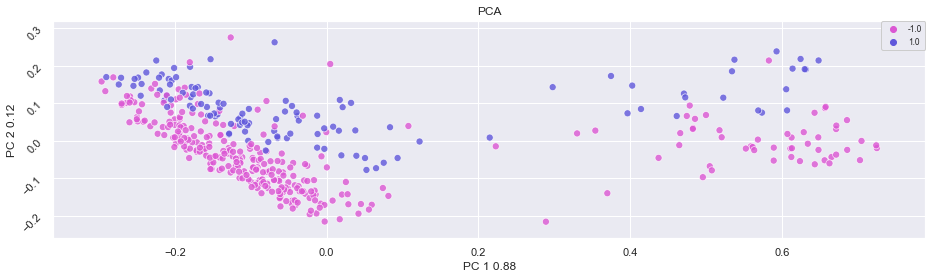

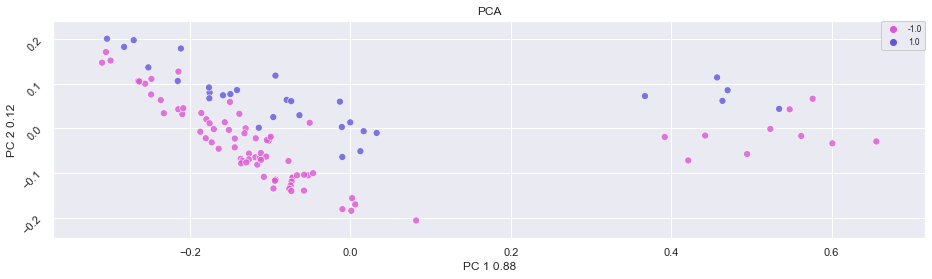

In [15]:
X_latent_kpca, X_latent_kpca_test = Models.perform_KPCA(X_train_norm, y_train, X_test_norm, y_test, gamma=0.002, n_components=100, variance_threshold=0)

We can see the transforme data, this time it keeps the left and right groups, but now we ve the -1 class samples above the 1 class samples. Let's see how it performs.

Results for PCA: 

Best score for training data: 0.7344025661587811 

Best C: 0.08 



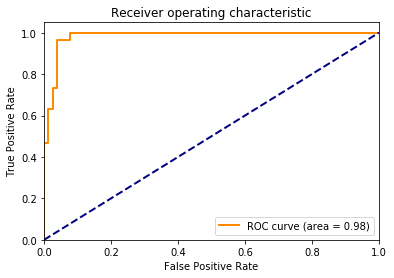

[[79  0]
 [30  0]]


              precision    recall  f1-score   support

          -1       0.72      1.00      0.84        79
           1       0.00      0.00      0.00        30

    accuracy                           0.72       109
   macro avg       0.36      0.50      0.42       109
weighted avg       0.53      0.72      0.61       109

Training set score for Logistic Regression: 0.734411
Testing  set score for Logistic Regression: 0.724771


C:\Users\Tomas\Anaconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best score for training data: 0.8313819834268912 

Best C: 0.1 

Best Gamma: scale 



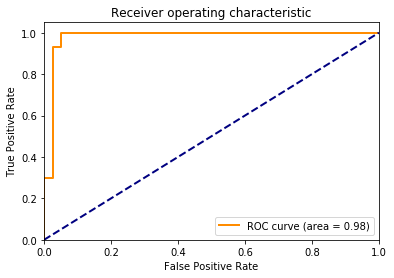

[[77  2]
 [11 19]]


              precision    recall  f1-score   support

          -1       0.88      0.97      0.92        79
           1       0.90      0.63      0.75        30

    accuracy                           0.88       109
   macro avg       0.89      0.80      0.83       109
weighted avg       0.88      0.88      0.87       109

Training set score for SVM: 0.882217
Testing  set score for SVM: 0.880734
Best score for training data: 0.8846297781341887 

Best #estimators: 140 

Best max depth: None 



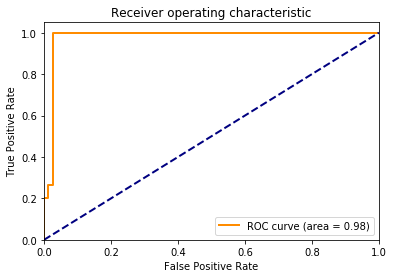

[[77  2]
 [ 6 24]]


              precision    recall  f1-score   support

          -1       0.93      0.97      0.95        79
           1       0.92      0.80      0.86        30

    accuracy                           0.93       109
   macro avg       0.93      0.89      0.90       109
weighted avg       0.93      0.93      0.92       109

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.926606


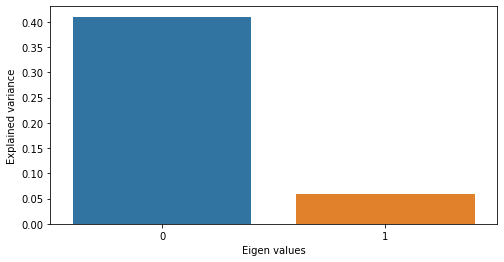

PCA on single-modal explained variance ratio: 0.46847555300077504


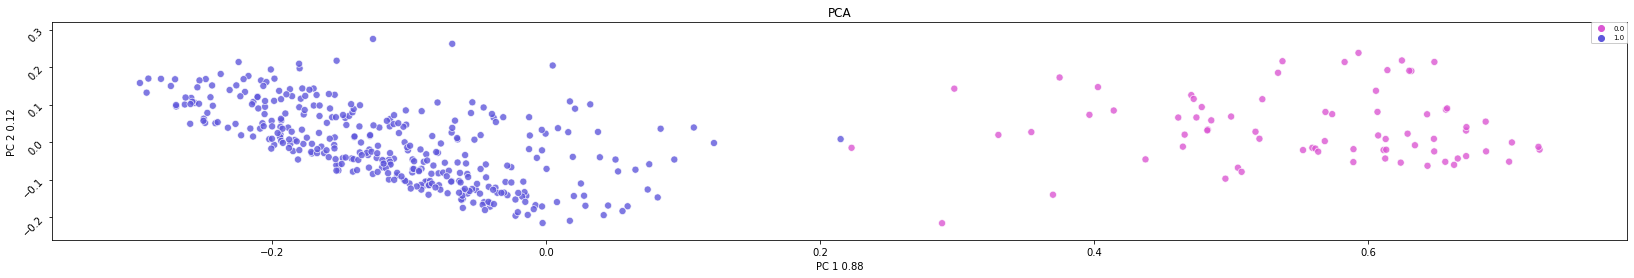

2 clusters -  silhoutte score: 0.5026161631977597 - mutual information: 0.0003339088774655787
3 clusters -  silhoutte score: 0.149363469916113 - mutual information: 0.01533025450556352
4 clusters -  silhoutte score: 0.14384794221311434 - mutual information: 0.031408770532262334


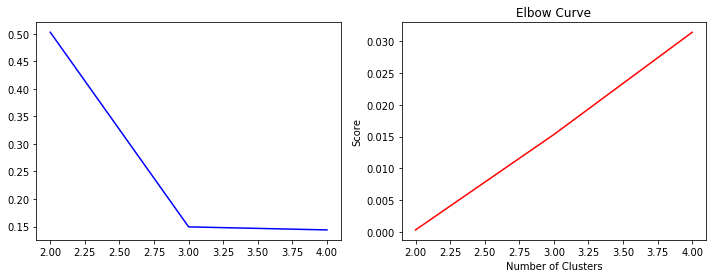

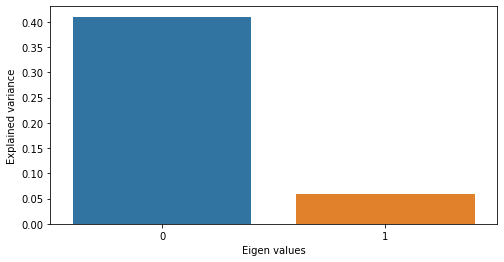

PCA on single-modal explained variance ratio: 0.46847555300077504


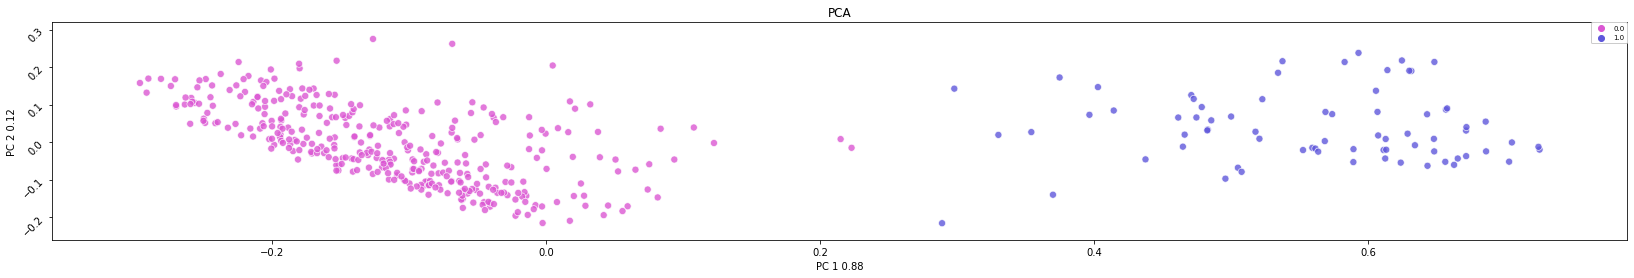

2 clusters -  silhoutte score: 0.504688044106192 - mutual information: 0.00048442643640750696
3 clusters -  silhoutte score: 0.15175979194980532 - mutual information: 0.05438072143092139
4 clusters -  silhoutte score: 0.14230918892285216 - mutual information: 0.06896825921127696


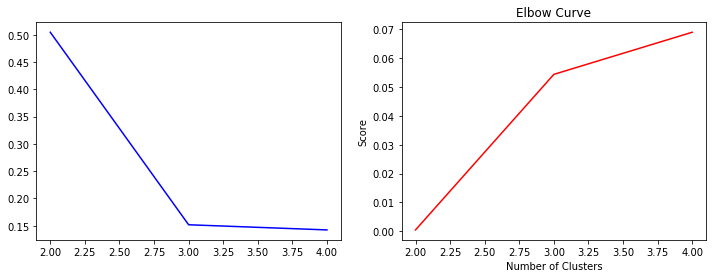

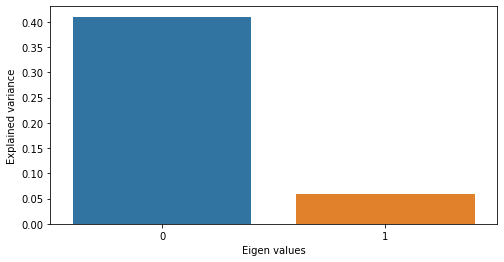

PCA on single-modal explained variance ratio: 0.46847555300077504


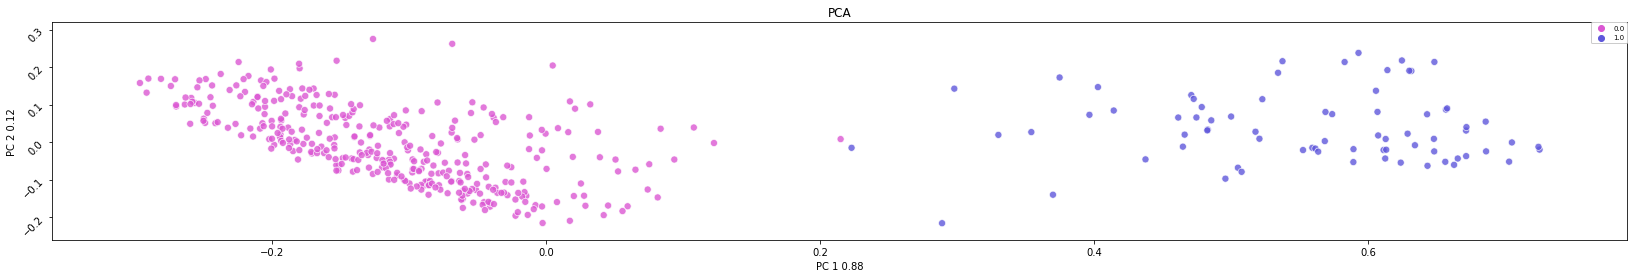

2 clusters -  silhoutte score: 0.5026161631977597 - mutual information: 0.0003339088774655787
3 clusters -  silhoutte score: 0.13455701578107931 - mutual information: 0.040612112345033216
4 clusters -  silhoutte score: 0.12286823240961803 - mutual information: 0.05074770911016627


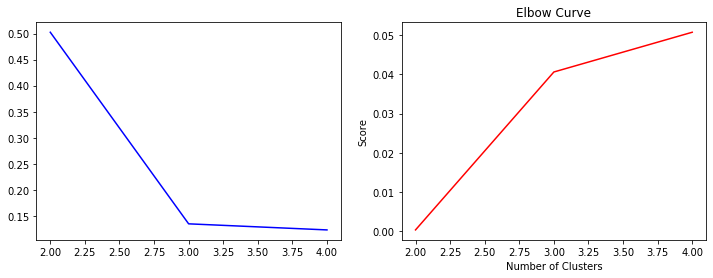

,LR accuracy,SVM accuracy,RF accuracy,LR ROC-AUC,SVM ROC-AUC,RF ROC-AUC,KMeans Silhouette,Spectral Silhouette,Hierarchical Silhouette,KMeans MI,Spectral MI,Hierarchical MI
original,0.972477,0.844037,0.981651,0.984810,0.973840,0.981857,0.486929,0.593030,0.483583,0.024269,0.004676,0.011294
PCA,0.963303,0.926606,0.935780,0.984388,0.980169,0.982700,0.541736,0.630137,0.539486,0.031765,0.006841,0.013284
KPCA,0.724771,0.880734,0.926606,0.983966,0.980591,0.980591,0.502616,0.504688,0.502616,0.000334,0.000484,0.000334


No classifier: 0.7247706422018348


In [56]:
### CLASSIFICATION ###
classify = Models.classify(X_latent_kpca, X_latent_kpca_test, np.ravel(y_train), np.ravel(y_test), model_type="PCA")
### CLUSTERING ###
clustering = Models.cluster(X_latent_kpca,np.ravel(y_train), model_type="KPCA")

kpca_scores = pd.DataFrame([classify + clustering], index=['KPCA'],
                      columns=["LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
display(pd.concat([original_scores, pca_scores, kpca_scores]))
print(f"No classifier: {no_classifier_score}")

The classification performance decreases, with LR performing as the No-classifier case. We see that on this dataset, the AUC-ROC curve does not provide very useful information, as it remains high even for no-classifier case. Clustering does not contribute any significant difference. 

1. Input layer: 5126 units.
2. Dense layer: 400 units.
3. Dense bottleneck layer: encoding dimension = 100 units.
4. Dropout layer: 10% dropout rate.
5. Batch Normalization layer.
6. Dense layer: 400 units.
7. Dense output layer: 5126 units.

We will now fit an Autoencoder and obtain its latent space. The obtained best performance hyperparameters are dropout = 0.1, l1=0 and l2=0.000005.

Compression: 51.26

Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00066: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00071: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00076: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00081: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.
Epoch 00082: early stopping


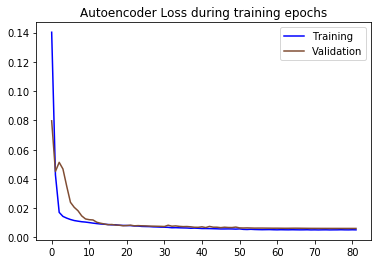

In [51]:
 ## Build and Train Autoencoder
autoencoder, encoder, decoder, loss = Models.build_and_train_autoencoder(X_train_norm,
                                                              X_train_norm,
                                                              encoding_dim=100, 
                                                              regularizer=tf.keras.regularizers.l1_l2(0,0.000005),
                                                              dropout=0.1,
                                                              epochs=200,
                                                              )

keras.utils.plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Encode datasets
X_latent_ae = Models.encode_dataset(X_train_norm, encoder)
X_latent_test_ae = Models.encode_dataset(X_test_norm, encoder)

First, we can visualize the AE latent space with PCA

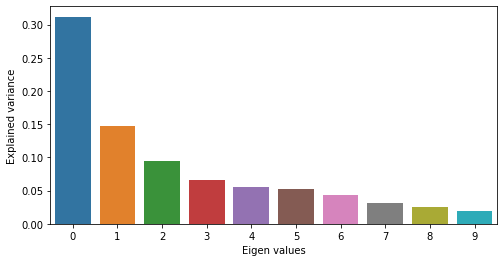

PCA on single-modal explained variance ratio: 0.8464609384536743


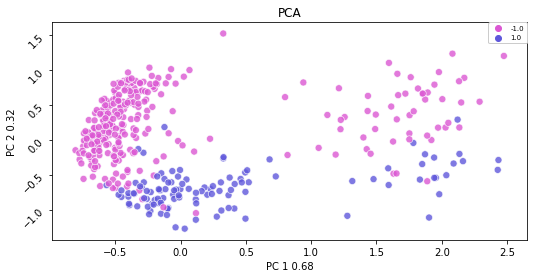

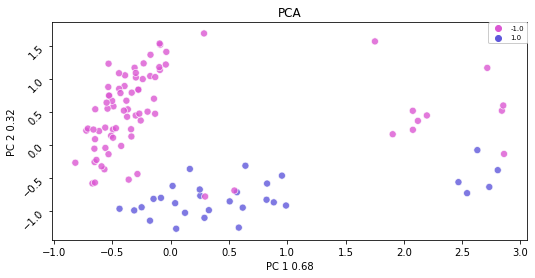

____


In [53]:
Models.perform_PCA(X_latent_ae, y_train, X_latent_test_ae, y_test)
print("____")

We can see the transformed data. There are still two groups, but this time we can see cleaner subgroups, specially on the left group. We can see that this setup will still be hard for the clustering algorithms, but let's evaluate it. 

Results for AE: 

Best score for training data: 0.9769847634322375 

Best C: 0.5 



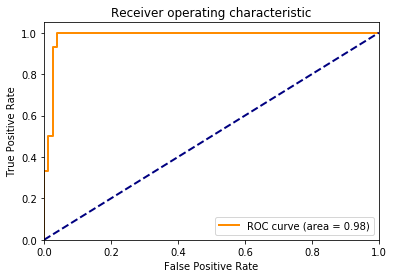

[[76  3]
 [ 1 29]]


              precision    recall  f1-score   support

          -1       0.99      0.96      0.97        79
           1       0.91      0.97      0.94        30

    accuracy                           0.96       109
   macro avg       0.95      0.96      0.95       109
weighted avg       0.96      0.96      0.96       109

Training set score for Logistic Regression: 0.981524
Testing  set score for Logistic Regression: 0.963303
Best score for training data: 0.970034750066827 

Best C: 0.5 

Best Gamma: 0.1 



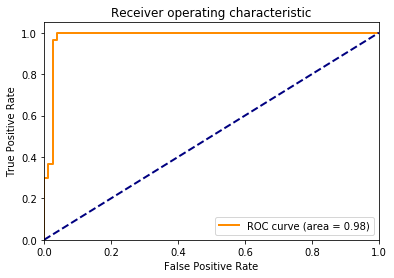

[[77  2]
 [ 1 29]]


              precision    recall  f1-score   support

          -1       0.99      0.97      0.98        79
           1       0.94      0.97      0.95        30

    accuracy                           0.97       109
   macro avg       0.96      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109

Training set score for SVM: 0.972286
Testing  set score for SVM: 0.972477
Best score for training data: 0.9653835872761294 

Best #estimators: 90 

Best max depth: 9 



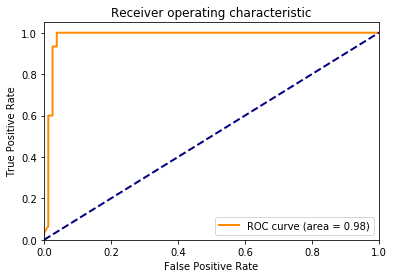

[[77  2]
 [ 3 27]]


              precision    recall  f1-score   support

          -1       0.96      0.97      0.97        79
           1       0.93      0.90      0.92        30

    accuracy                           0.95       109
   macro avg       0.95      0.94      0.94       109
weighted avg       0.95      0.95      0.95       109

Training set score for RFC: 1.000000
Testing  set score for RFC: 0.954128


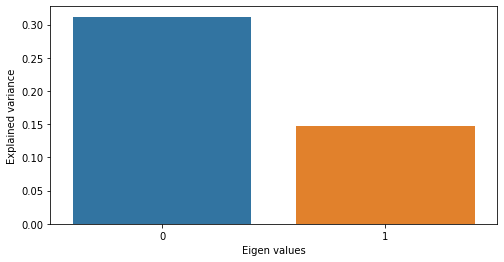

PCA on single-modal explained variance ratio: 0.4583504796028137


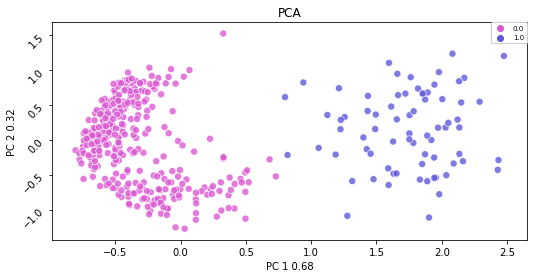

2 clusters -  silhoutte score: 0.4249022305011749 - mutual information: 0.00048442643640750696
3 clusters -  silhoutte score: 0.25094205141067505 - mutual information: 0.4937847396047546
4 clusters -  silhoutte score: 0.19600805640220642 - mutual information: 0.382377751686328


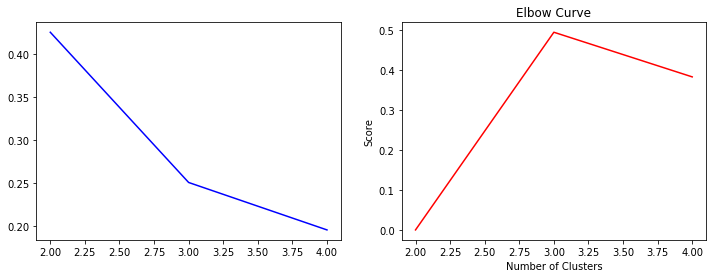

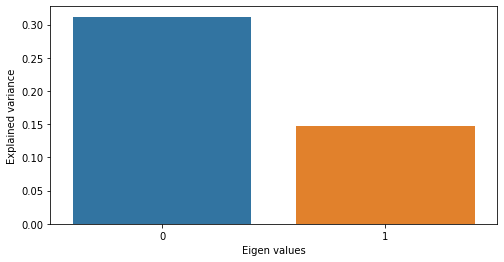

PCA on single-modal explained variance ratio: 0.4583504796028137


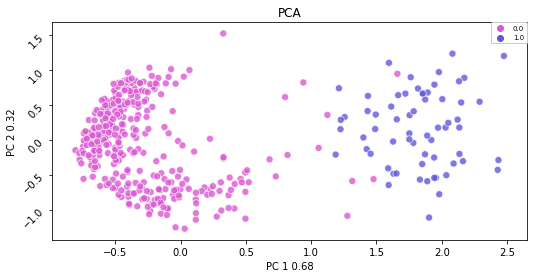

2 clusters -  silhoutte score: 0.41793420910835266 - mutual information: 0.0002164112917735976
3 clusters -  silhoutte score: 0.40061503648757935 - mutual information: 0.019280738105951958
4 clusters -  silhoutte score: 0.3768772780895233 - mutual information: 0.07164915949309703


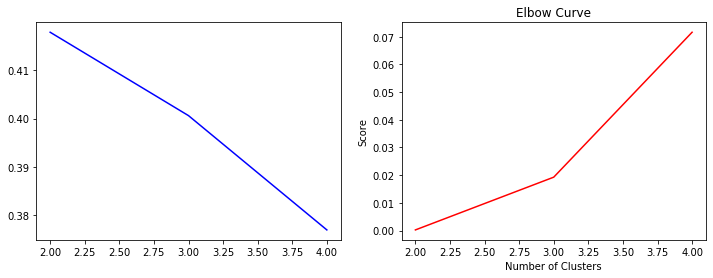

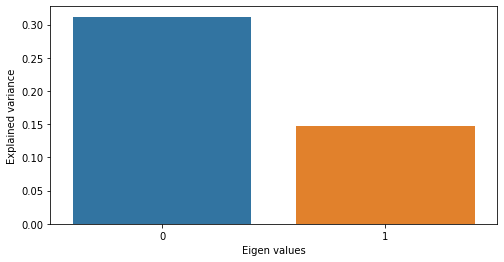

PCA on single-modal explained variance ratio: 0.4583504796028137


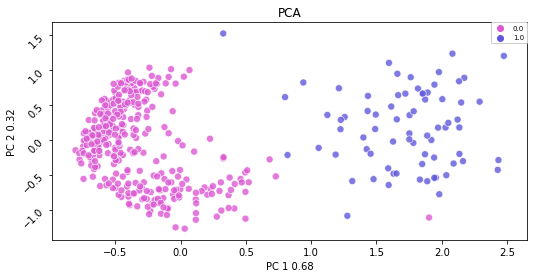

2 clusters -  silhoutte score: 0.42097291350364685 - mutual information: 7.040106130255923e-05
3 clusters -  silhoutte score: 0.2207270860671997 - mutual information: 0.31335334384846897
4 clusters -  silhoutte score: 0.2351933866739273 - mutual information: 0.3853235087496783


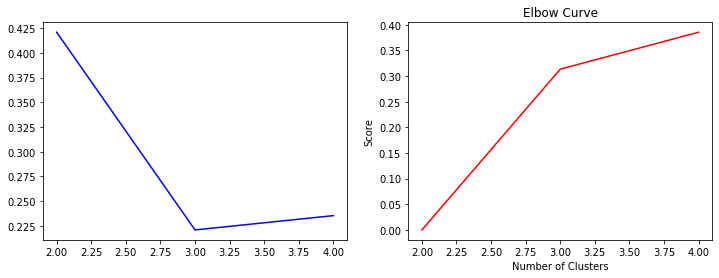

,LR accuracy,SVM accuracy,RF accuracy,LR ROC-AUC,SVM ROC-AUC,RF ROC-AUC,KMeans Silhouette,Spectral Silhouette,Hierarchical Silhouette,KMeans MI,Spectral MI,Hierarchical MI
original,0.972477,0.844037,0.981651,0.984810,0.973840,0.981857,0.486929,0.593030,0.483583,0.024269,0.004676,0.011294
PCA,0.963303,0.926606,0.935780,0.984388,0.980169,0.982700,0.541736,0.630137,0.539486,0.000484,0.004701,0.000334
KPCA,0.724771,0.880734,0.926606,0.983966,0.980591,0.980591,0.502616,0.504688,0.502616,0.000334,0.000484,0.000334
AE,0.963303,0.972477,0.954128,0.984388,0.982700,0.982068,0.424902,0.417934,0.420973,0.000484,0.000216,0.000070


No classifier: 0.7247706422018348


In [58]:
### CLASSIFICATION ###
classify = Models.classify_with_cv(X_latent_ae, X_latent_test_ae, np.ravel(y_train), np.ravel(y_test), model_type="AE")
### CLUSTERING ###
clustering = Models.cluster(X_latent_ae,np.ravel(y_train), model_type="AE")

ae_scores = pd.DataFrame([classify + clustering], index=['AE'],
                      columns=["LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
display(pd.concat([original_scores, pca_scores, kpca_scores, ae_scores]))
print(f"No classifier: {no_classifier_score}")

We see that the AE improves the overall accuracy, but the clustering performance is very low a priori. However, what we noticed here, is that if we set the clustering algorithms to look for 4 clusters, we get a much higher mutual information. We can see it with PCA. 

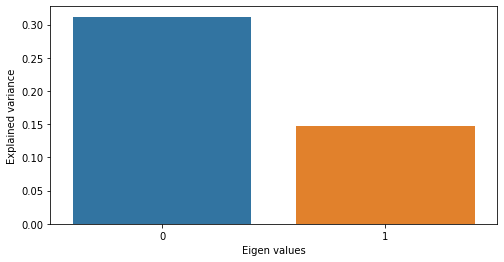

PCA on single-modal explained variance ratio: 0.4583504796028137


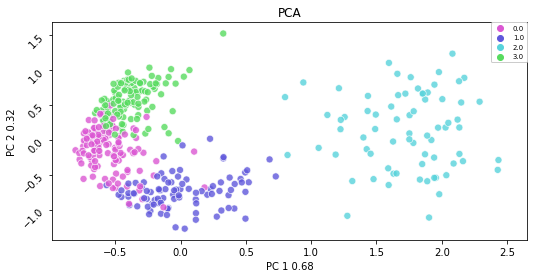

4 clusters -  silhoutte score: 0.19600805640220642 - mutual information: 0.382377751686328


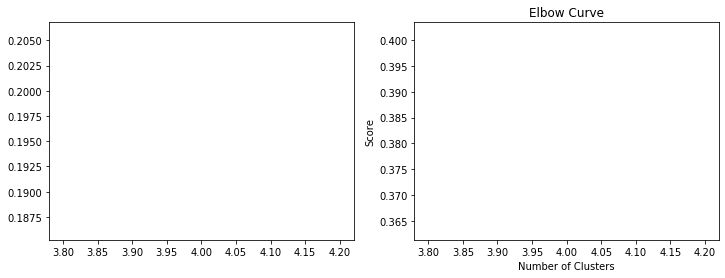

(0.19600806, 0.382377751686328)

In [60]:
Models.k_means(X_latent_ae,np.ravel(y_train),[4])

Even though the value of the Mutual information is substantially greater, by visualizing the principalcomponents, we notice that the groups formed are not similar to the original data.
Higher values of Mutual Information and Silohuette score, could mean that we can find well defined subclasses of the original classes, providing valuable information. 

Let's try the final model proposed, the DAE. The hyperparameters found this time are dropout=0.1, l1=0.00001, l2=0.00005. The noisy dataset consists of 15% of swapped features.

Compression: 51.26

Epoch 00065: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00075: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00096: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.
Epoch 00102: early stopping


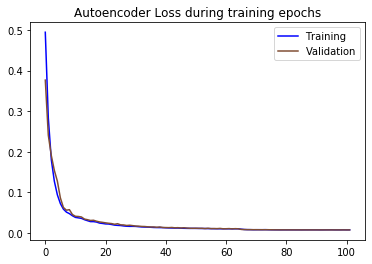

In [63]:
 ## Build and Train Autoencoder
autoencoder, encoder, decoder, loss = Models.build_and_train_autoencoder(X_train_swapped,
                                                              X_train_norm,
                                                              encoding_dim=100, 
                                                              regularizer=tf.keras.regularizers.l1_l2(0.00001,0.00005),
                                                              dropout=0.1,
                                                              epochs=200,
                                                              )

keras.utils.plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Encode datasets
X_latent_dae = Models.encode_dataset(X_train_norm, encoder)
X_latent_test_dae = Models.encode_dataset(X_test_norm, encoder)

Visualizing with PCA

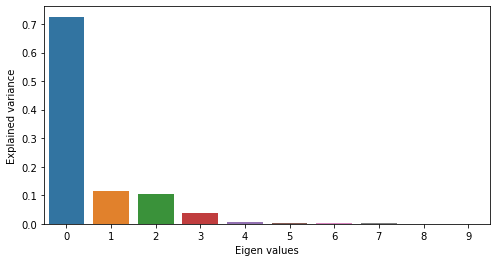

PCA on single-modal explained variance ratio: 0.9960729479789734


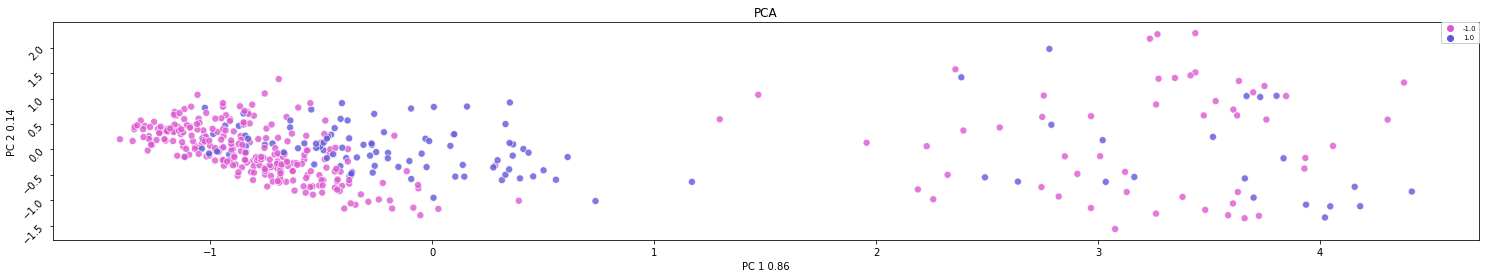

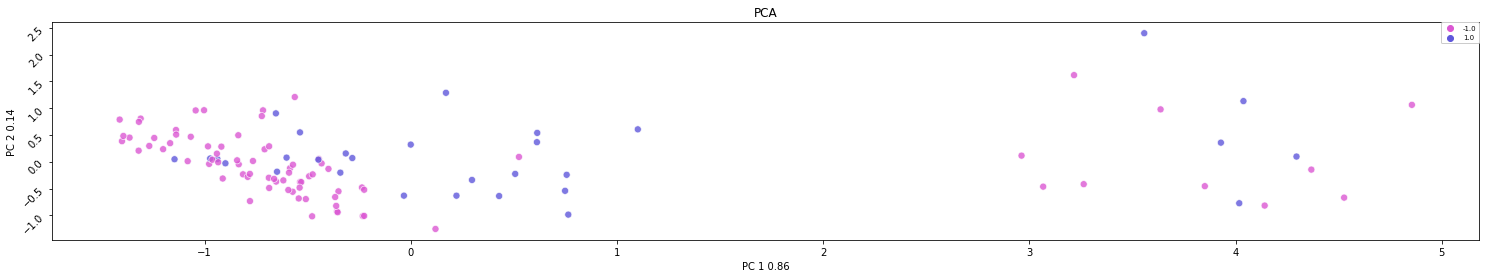

____


In [66]:
Models.perform_PCA(X_latent_dae, y_train, X_latent_test_dae, y_test)
print("____")

The visualization suggests more overlapped data. Let's try evaluate it then.

Results for DAE: 

Best score for training data: 0.9468591285752472 

Best C: 0.5 



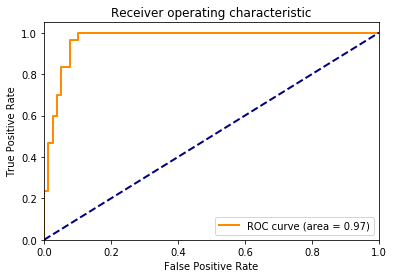

[[75  4]
 [ 9 21]]


              precision    recall  f1-score   support

          -1       0.89      0.95      0.92        79
           1       0.84      0.70      0.76        30

    accuracy                           0.88       109
   macro avg       0.87      0.82      0.84       109
weighted avg       0.88      0.88      0.88       109

Training set score for Logistic Regression: 0.956120
Testing  set score for Logistic Regression: 0.880734
Best score for training data: 0.9423416198877306 

Best C: 0.5 

Best Gamma: 0.5 



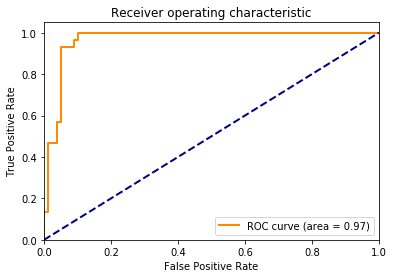

[[75  4]
 [ 6 24]]


              precision    recall  f1-score   support

          -1       0.93      0.95      0.94        79
           1       0.86      0.80      0.83        30

    accuracy                           0.91       109
   macro avg       0.89      0.87      0.88       109
weighted avg       0.91      0.91      0.91       109

Training set score for SVM: 0.958430
Testing  set score for SVM: 0.908257
Best score for training data: 0.9376637262763966 

Best #estimators: 115 

Best max depth: 8 



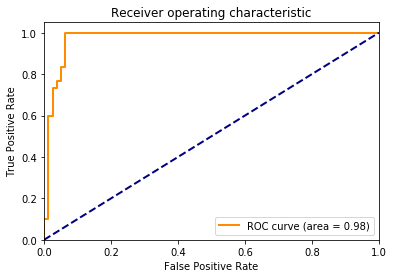

[[77  2]
 [ 9 21]]


              precision    recall  f1-score   support

          -1       0.90      0.97      0.93        79
           1       0.91      0.70      0.79        30

    accuracy                           0.90       109
   macro avg       0.90      0.84      0.86       109
weighted avg       0.90      0.90      0.89       109

Training set score for RFC: 0.990762
Testing  set score for RFC: 0.899083


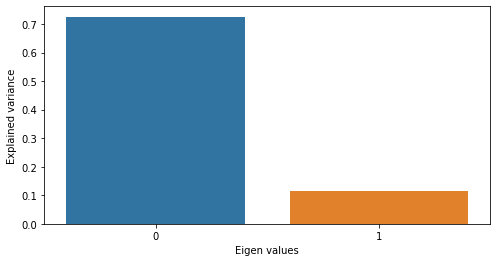

PCA on single-modal explained variance ratio: 0.8389027118682861


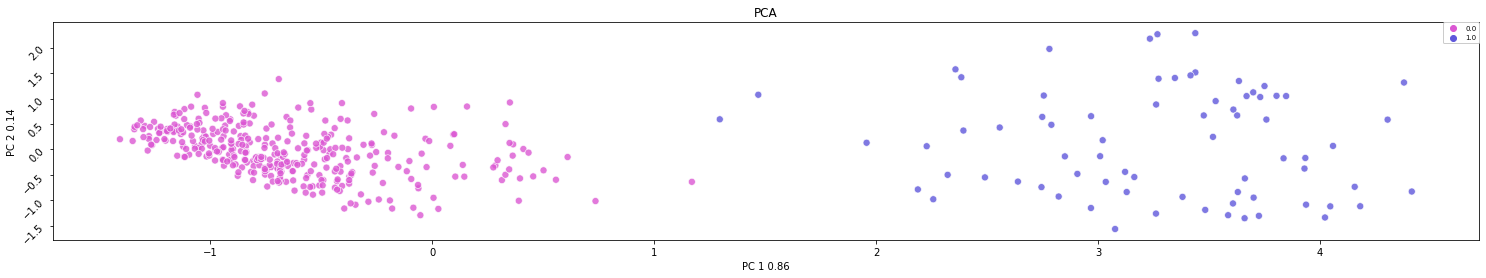

2 clusters -  silhoutte score: 0.6899535059928894 - mutual information: 0.00048442643640750696


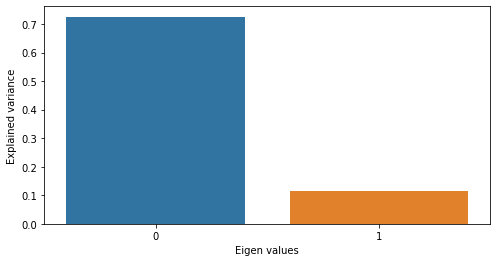

PCA on single-modal explained variance ratio: 0.8389027118682861


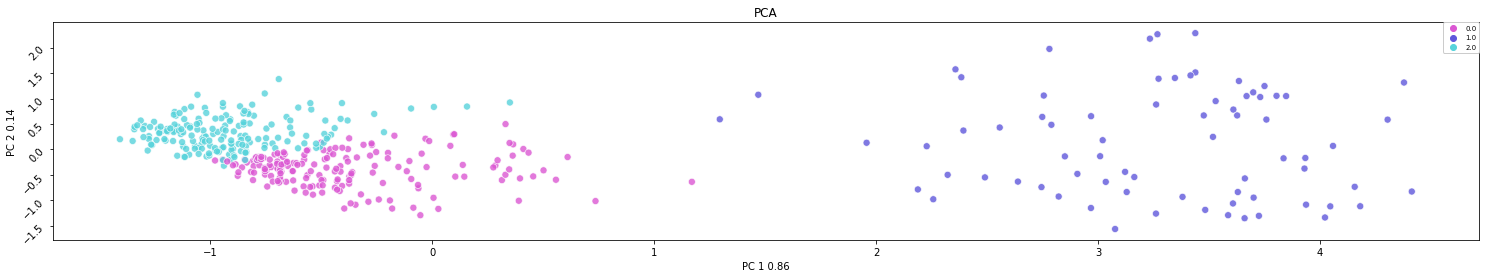

3 clusters -  silhoutte score: 0.3119069039821625 - mutual information: 0.005001631748684987


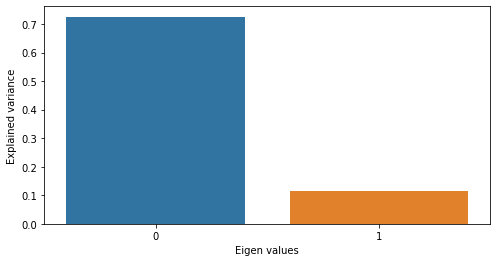

PCA on single-modal explained variance ratio: 0.8389027118682861


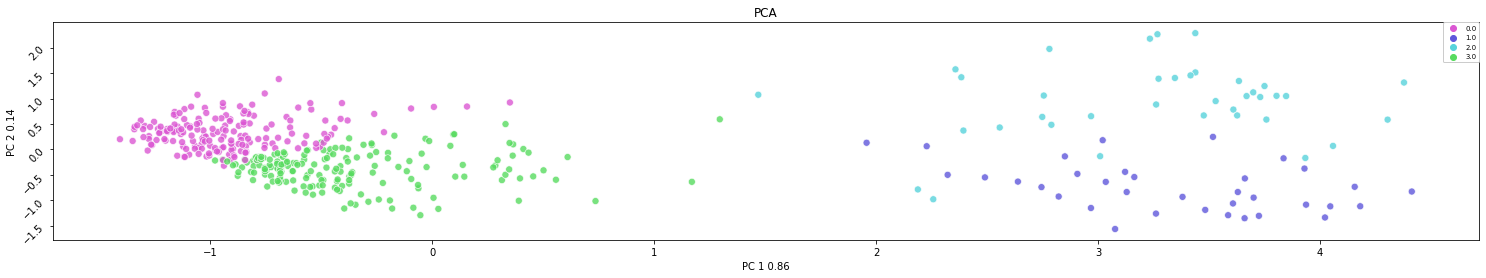

4 clusters -  silhoutte score: 0.29826781153678894 - mutual information: 0.013101831901528426


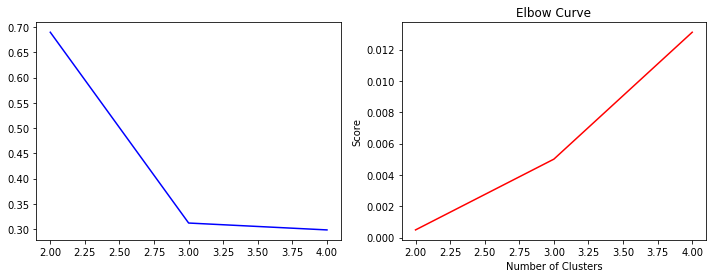

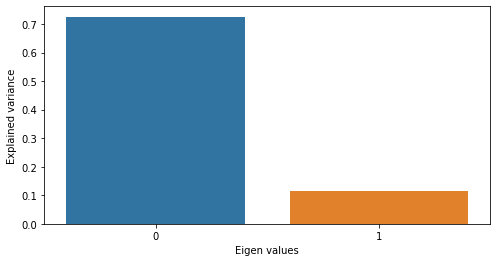

PCA on single-modal explained variance ratio: 0.8389027118682861


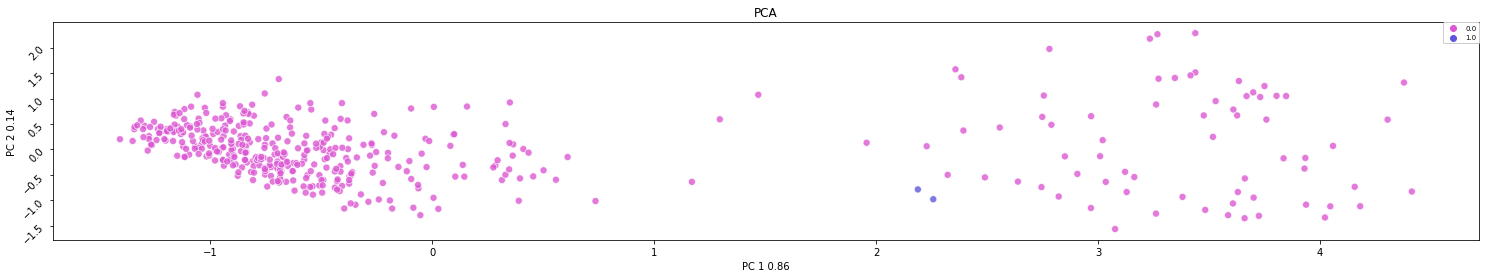

2 clusters -  silhoutte score: 0.6089680790901184 - mutual information: 0.004700797981186954
3 clusters -  silhoutte score: 0.6942086219787598 - mutual information: 0.0037376649131290103
4 clusters -  silhoutte score: 0.6728187203407288 - mutual information: 0.012827327204769343


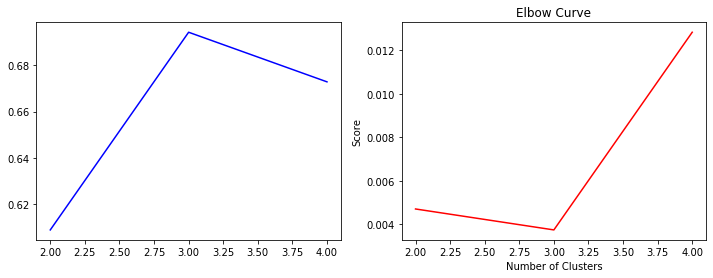

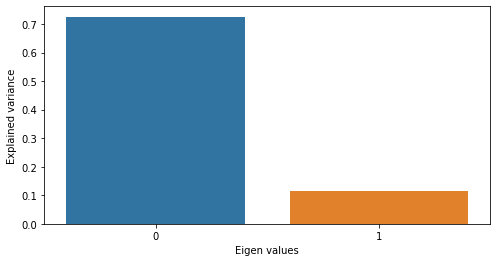

PCA on single-modal explained variance ratio: 0.8389027118682861


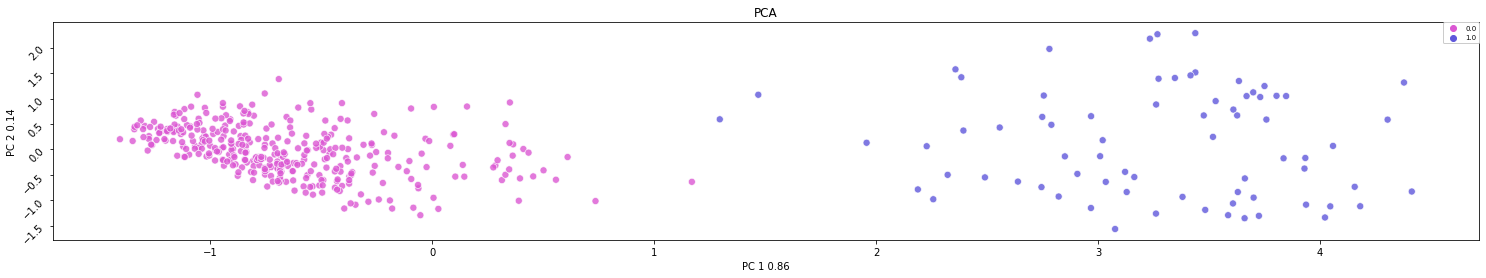

2 clusters -  silhoutte score: 0.6899535059928894 - mutual information: 0.00048442643640750696
3 clusters -  silhoutte score: 0.34309661388397217 - mutual information: 0.42632761927980783
4 clusters -  silhoutte score: 0.32787570357322693 - mutual information: 0.4125479563130619


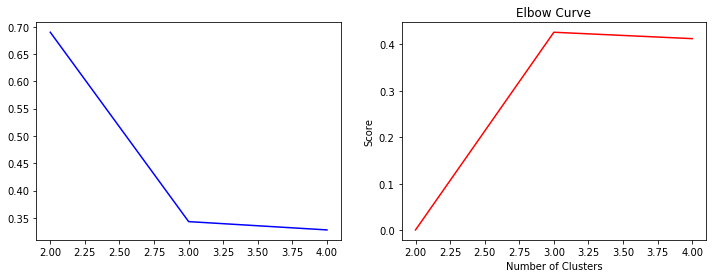

,LR accuracy,SVM accuracy,RF accuracy,LR ROC-AUC,SVM ROC-AUC,RF ROC-AUC,KMeans Silhouette,Spectral Silhouette,Hierarchical Silhouette,KMeans MI,Spectral MI,Hierarchical MI
original,0.972477,0.844037,0.981651,0.984810,0.973840,0.981857,0.486929,0.593030,0.483583,0.024269,0.004676,0.011294
PCA,0.963303,0.926606,0.935780,0.984388,0.980169,0.982700,0.541736,0.630137,0.539486,0.000484,0.004701,0.000334
KPCA,0.724771,0.880734,0.926606,0.983966,0.980591,0.980591,0.502616,0.504688,0.502616,0.000334,0.000484,0.000334
AE,0.963303,0.972477,0.954128,0.984388,0.982700,0.982068,0.424902,0.417934,0.420973,0.000484,0.000216,0.000070
DAE,0.880734,0.908257,0.899083,0.969620,0.967089,0.975105,0.689954,0.608968,0.689954,0.000484,0.004701,0.000484


No classifier: 0.7247706422018348


In [67]:
### CLASSIFICATION ###
classify = Models.classify_with_cv(X_latent_dae, X_latent_test_dae, np.ravel(y_train), np.ravel(y_test), model_type="DAE")
### CLUSTERING ###
clustering = Models.cluster(X_latent_dae,np.ravel(y_train), model_type="DAE")

dae_scores = pd.DataFrame([classify + clustering], index=['DAE'],
                      columns=["LR accuracy","SVM accuracy", "RF accuracy", "LR ROC-AUC", "SVM ROC-AUC", "RF ROC-AUC","KMeans Silhouette","Spectral Silhouette","Hierarchical Silhouette","KMeans MI","Spectral MI","Hierarchical MI"])    
display(pd.concat([original_scores, pca_scores, kpca_scores, ae_scores, dae_scores]))
print(f"No classifier: {no_classifier_score}")

The classification performance decreased substantially. The clusters remain very different from the actual classes, however in this case the silohuette score suggests more dense and tight clusters.

#### Conclusion
For this dataset, we got mixed results, so we can not conclude that an specific model should be used. Instead, we see that, for classificiation, the AE performance was better overall and we could use it to explore new subclasses, as we found that the Mutual Information increased for 4 clusters, and we could improve it by optimizing on this metric. As we initially suspected by observing the principal components plot, the data was divided in two separated groups of low overlapped data, thus the classifiers trained could find efficient decision boundaries, but the clustering algorithms found the 2 big "left and right" groups.